In [1]:
install.packages("text2vec")

also installing the dependencies ‘lambda.r’, ‘futile.options’, ‘futile.logger’, ‘mlapi’, ‘sparsepp’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
load("data/mymovies.Rdata")

In [6]:
library(text2vec)
library(magrittr)
tokens <- mymovies$tomatoConsensus %>% tolower %>% word_tokenizer
vocabulary <- create_vocabulary(it = itoken(tokens))
vocabulary <- prune_vocabulary(vocabulary, term_count_min = 8)
vectorizer <- vocab_vectorizer(vocabulary = vocabulary)
tcm <- create_tcm(it = itoken(tokens), vectorizer = vectorizer, skip_grams_window = 5)

In [7]:
# matrix of words/coocurrences
dim(tcm)

[1] 1010 1010

In [8]:
class(tcm)

[1] "dgTMatrix"
attr(,"package")
[1] "Matrix"

In [9]:
rownames(tcm)[1:5]
colnames(tcm)[1:5]

[1] "uses"  "blood" "rise"  "fault" "goes"

[1] "uses"  "blood" "rise"  "fault" "goes"

In [10]:
# Fit a Glove model by using the R6 class GlobalVectors
myglovemodel <- GlobalVectors$new(word_vectors_size = 50, 
                                  vocabulary = vocabulary, x_max = 10, alpha = 0.75) 

In [11]:
myglovemodel$fit_transform(tcm, n_iter = 40)

INFO [2018-03-25 15:12:24] 2018-03-25 15:12:24 - epoch 1, expected cost 0.1043
INFO [2018-03-25 15:12:24] 2018-03-25 15:12:24 - epoch 2, expected cost 0.0543
INFO [2018-03-25 15:12:25] 2018-03-25 15:12:25 - epoch 3, expected cost 0.0427
INFO [2018-03-25 15:12:25] 2018-03-25 15:12:25 - epoch 4, expected cost 0.0354
INFO [2018-03-25 15:12:25] 2018-03-25 15:12:25 - epoch 5, expected cost 0.0302
INFO [2018-03-25 15:12:26] 2018-03-25 15:12:26 - epoch 6, expected cost 0.0264
INFO [2018-03-25 15:12:26] 2018-03-25 15:12:26 - epoch 7, expected cost 0.0234
INFO [2018-03-25 15:12:26] 2018-03-25 15:12:26 - epoch 8, expected cost 0.0210
INFO [2018-03-25 15:12:27] 2018-03-25 15:12:27 - epoch 9, expected cost 0.0191
INFO [2018-03-25 15:12:27] 2018-03-25 15:12:27 - epoch 10, expected cost 0.0175
INFO [2018-03-25 15:12:27] 2018-03-25 15:12:27 - epoch 11, expected cost 0.0162
INFO [2018-03-25 15:12:28] 2018-03-25 15:12:28 - epoch 12, expected cost 0.0151
INFO [2018-03-25 15:12:28] 2018-03-25 15:12:28 - 

uses,0.161482275,-0.235846296,-0.19626854,0.4501833618,-0.132885352,0.323925614,0.322251767,0.398611367,-0.17901257,0.153603345,⋯,0.006416636,-0.19647819,0.241063669,0.19521534,0.17924014,0.15262471,0.20419040,0.203124180,-0.344907850,-0.57450008
blood,-0.279464275,0.435851127,-0.44259527,-0.1288184822,-0.402399361,-0.183601841,0.267091542,-0.358536273,0.09422890,-0.535606503,⋯,-0.219876811,0.09294888,-0.124074772,-0.14612840,0.19863257,-0.22991054,0.03084095,-0.805033326,0.404328495,-0.36866102
rise,0.097451903,0.510276794,0.18335614,-0.2139561772,0.162654281,-0.260560662,-0.148282722,-0.477735013,0.11988264,-0.247061804,⋯,0.133055061,-0.21196121,0.391974539,0.43858379,0.30032188,0.48972973,-0.28643510,0.392068624,0.059510905,0.14436175
fault,0.533086181,-0.293942511,-0.36835873,-0.0807071477,-0.336631745,0.194092020,0.515066266,0.007705862,0.13054231,-0.052632760,⋯,0.446279615,0.38979277,0.235829458,0.29199579,-0.46515661,-0.13887855,0.08938926,-0.325990915,0.141786665,-0.16886331
goes,-0.416886538,-0.415749341,0.39341119,0.2700917125,0.300393432,-0.320875376,-0.727846622,-0.124010421,0.34507602,-0.166124269,⋯,0.986000299,0.07219855,0.389218330,0.19955207,0.45909420,0.21656850,0.24370959,-0.014396129,-0.313674629,0.04003611
rote,-0.333790898,-0.203014195,-0.20246504,0.3369590938,0.220033675,0.396554232,0.118291736,-0.245322600,0.21649615,-0.271499813,⋯,-0.362079024,0.11526624,-0.656759262,0.29158539,-0.27949035,0.02024239,-0.35204187,0.158608407,0.256891042,-0.13550110
explores,0.170887098,0.090755209,0.51626617,-0.0489552021,0.170478165,0.189175531,-0.359669596,0.193022579,-0.14107458,-0.250852287,⋯,0.402557194,0.38278681,-0.093923658,-0.03007485,-0.10639958,0.26005331,-0.03268508,-0.652733386,0.342970073,0.05519013
lee's,-0.464372069,0.179659605,0.14968126,0.0009977589,-0.268157274,0.258133143,-0.061082337,0.391951025,-0.47892937,0.171761632,⋯,-0.514035463,0.30950907,0.054976817,0.03421362,0.27637163,-0.11454049,-0.10946044,-0.116730958,-0.019900484,-0.21020339
incoherent,-0.352329522,-0.504311979,0.29414970,-0.2674376965,0.301507205,-0.595360875,0.459653944,0.469358265,0.65306294,0.137653455,⋯,-0.184885398,-0.50084782,-0.210474163,0.55884546,-0.28599390,0.04159955,0.31158078,0.115428627,-0.609766483,-0.03860732
such,0.435367674,-0.229221135,0.12357385,0.2944330275,0.216329426,-0.174791798,0.260064304,0.041871630,0.23451298,0.483153582,⋯,0.069654964,-0.31737339,-0.045278788,0.50148898,0.16948435,-0.24060212,0.19187488,0.163565874,-0.082093313,-0.22539487
aren't,0.047945563,-0.167079687,0.25841635,0.1906893849,0.127554014,-0.271835357,0.170480624,-0.588753939,-0.04006525,0.165831953,⋯,-0.015643800,0.40213990,-0.116038539,0.54608083,-0.16582276,0.04081319,-0.24737091,0.711494327,0.035018601,-0.14922588


In [13]:
# get word vectors from model
wordvectors <- myglovemodel$components
dim(wordvectors)

[1]   50 1010

In [14]:
head(wordvectors[, 1:5])

uses,blood,rise,fault,goes
-0.009764111,-0.05725985,-0.13746835,-0.50414735,0.15462382
-0.087881215,0.25683773,-0.28737813,0.32203469,0.06066715
-0.128214926,0.02824693,0.13525251,-0.43733615,0.10784697
-0.194301218,0.75318557,0.01994498,-0.17893241,-0.01724440
0.381766170,0.33691466,-0.06484832,0.09231425,-0.36765271
0.263043225,-0.19169679,-0.29403251,0.17242160,0.48827314


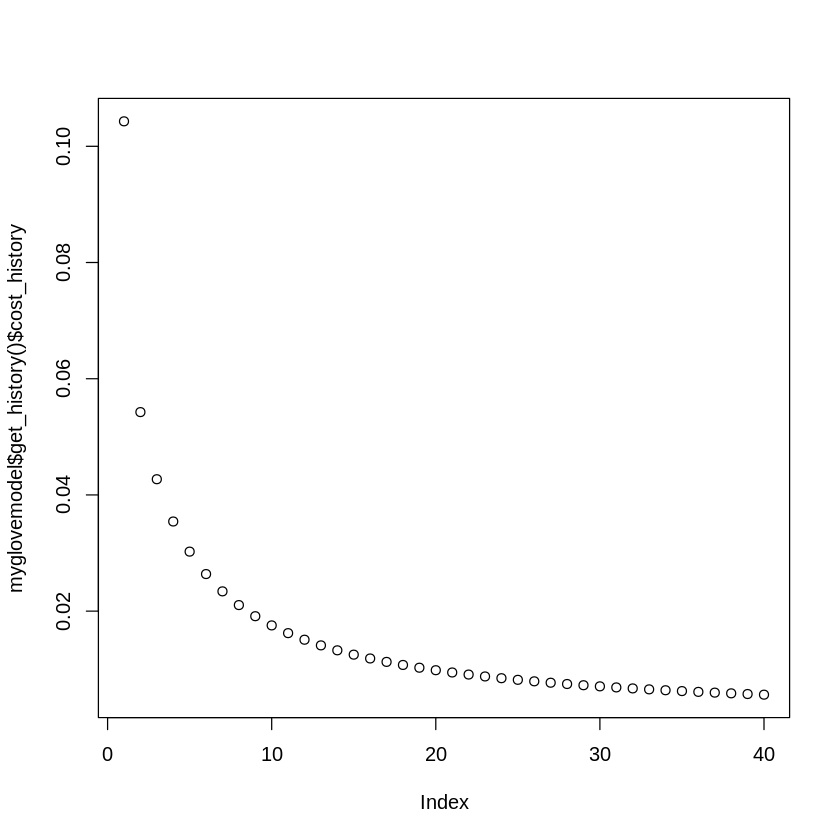

In [15]:
## Visualise evolution of cost fit over iterations
plot(myglovemodel$get_history()$cost_history)

In [16]:
wordvectors <- t(wordvectors)
cos_sim <- sim2(x = wordvectors, y = wordvectors["remake", , drop = FALSE], 
                method = "cosine", norm = "l2")
head(sort(cos_sim[, 1], decreasing = TRUE), 10)

remake       night         one        tale        bite         war 
  1.0000000   0.5152298   0.4548889   0.4412736   0.3876420   0.3839732 
      times       works         men installment 
  0.3618896   0.3594356   0.3532252   0.3509844

In [17]:
cos_sim <- sim2(x = wordvectors, y = wordvectors["action", , drop = FALSE] + wordvectors["zombie", , drop = FALSE], 
                method = "cosine", norm = "l2")
head(sort(cos_sim[, 1], decreasing = TRUE), 10)

action     zombie  provoking       teen       kids     appeal      great 
 0.8308035  0.5382480  0.3785623  0.3766200  0.3679422  0.3546268  0.3522586 
 sequences   boasting impressive 
 0.3388682  0.3200900  0.3179534

In [ ]:
# exercise 1 : Do the traditional analogy task as in a a man is to a woman as a king is to a queen. With comedies/jokes and action/...

In [ ]:
# exercise 2: Build a Glove model on the brussels review dataset in the data folder. 

In [ ]:
# exercise 3:  Use the word embeddings to ﬁnd out the words which are the most similar to Brussels

In [ ]:
# exercise 4: What is the most similar to an appartment without a bedroom. Is it a studio?